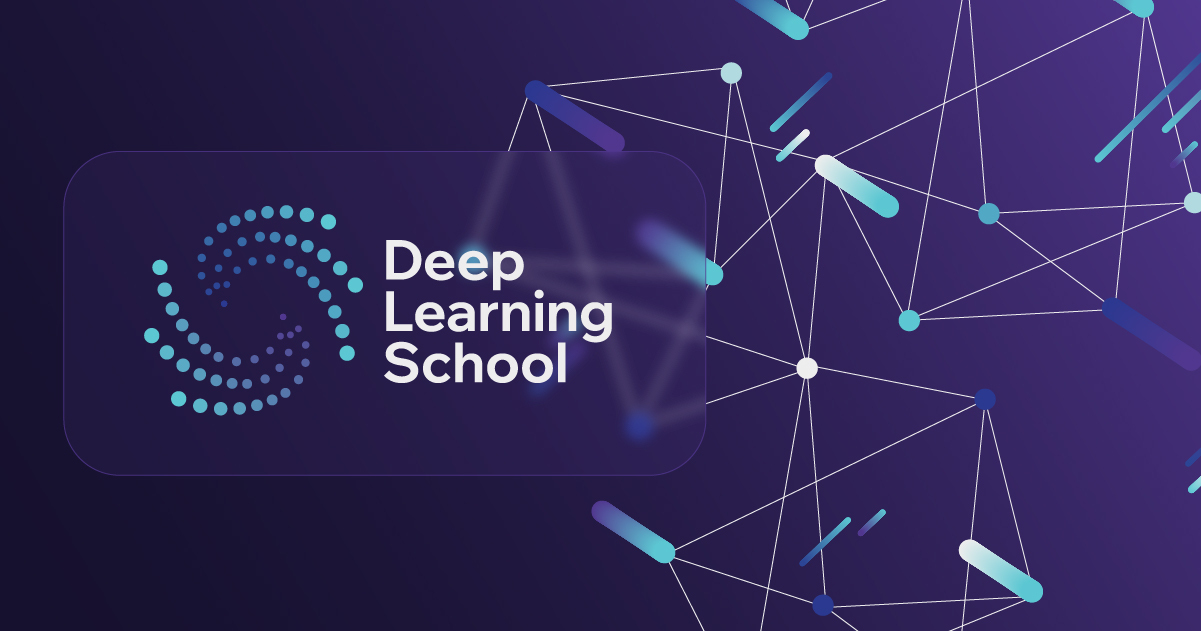

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

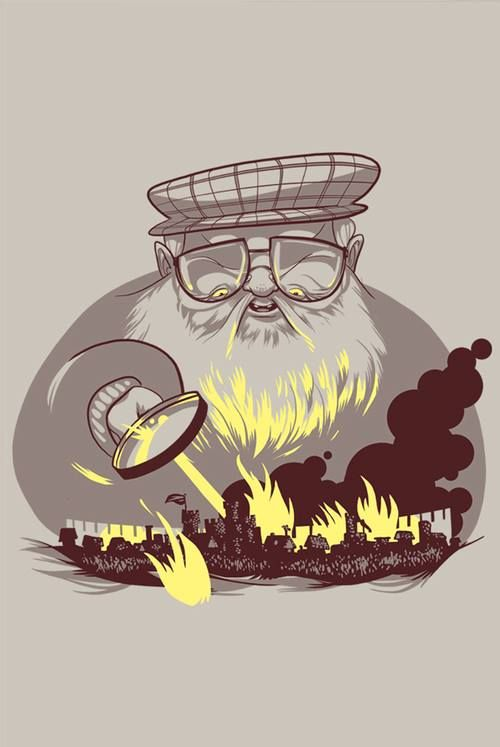

В некоторых местах я убрала какие-то уже написанные абзацы, если не считала их нужными (и успевала это сделать). А еще немного улучшила содержание, чтобы в нем было немного проще ориентироваться (по заданиям)

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Возраст

* **male**: Мужчина или женщина

* **dateOfBirth**: Дата рождения, Отсчет времени: 305 AC

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 17.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 17.5MB/s]


#### **Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### **Задание 1.2.** Загрузка данных
Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


Посмотрите, какие типы данных представлены в нашем датасете

In [4]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


Знакомый нам метод describe() возвращает различную информацию для столбцов с числовыми типами данных, и с типами данных *object*

Давайте посмотрим на вывод для типа данных *object*

In [5]:
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


Теперь давайте посмотрим на столбцы с числовыми типами данных. Для удобства восприятия мы транспонировали таблицу и ограничили вывод тремя столбцами - количество строк без NaN, максимальное и минимальное значение

In [6]:
data.describe(include = ['int64', 'float64']).T[['count', 'min', 'max']]

,count,min,max
male,1557.0,0.0,1.0
dateOfBirth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
isAliveMother,18.0,0.0,1.0
isAliveFather,22.0,0.0,1.0
isAliveHeir,21.0,0.0,1.0


Так мы проверим, есть ли в данных неадекватнные значения.   Большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа (анонс - а в тестовых данных нас будет ждать сюрприз).

#### **Задание 1.3.** Предобработка (очистка) данных.

В нашем домашнем задании все пропуски в данных (missing values) уже закодированы как NaN. Проанализируйте, в каких колонках и как часто встречаются NaN значения. Далее вам надо будет принять решение, как их обрабатывать.

In [7]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то мы потеряем много данных
- в тестовом датасете также много признаков с NaN. Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     



В наших данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем)

Ниже мы посмотрим, как можно работать с признаками с большим количеством пропущенных значений.

#### **Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте [гистограмму](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) распределения данного признака с количеством интервалов (bins), равным 50

Ниже мы преобразуем признаки **popularity, numDeadRelations, age, dateOfBirth**

Для начала посмотрим на колонки с числовыми признаками

In [8]:
numeric_columns = [column for column in data.columns if data[column].dtype != 'O']
numeric_columns

['male',
 'dateOfBirth',
 'book1',
 'book2',
 'book3',
 'book4',
 'book5',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'isMarried',
 'isNoble',
 'age',
 'numDeadRelations',
 'popularity',
 'isAlive']

Здесь есть такие признаки как `isAliveMother`, `isAliveFather` и другие. Хоть они и выражаются численно, но они категориальные, так что обрабатывать пропуски в них мы будем при работе с категориальными признаками

##### Признак **popularity**

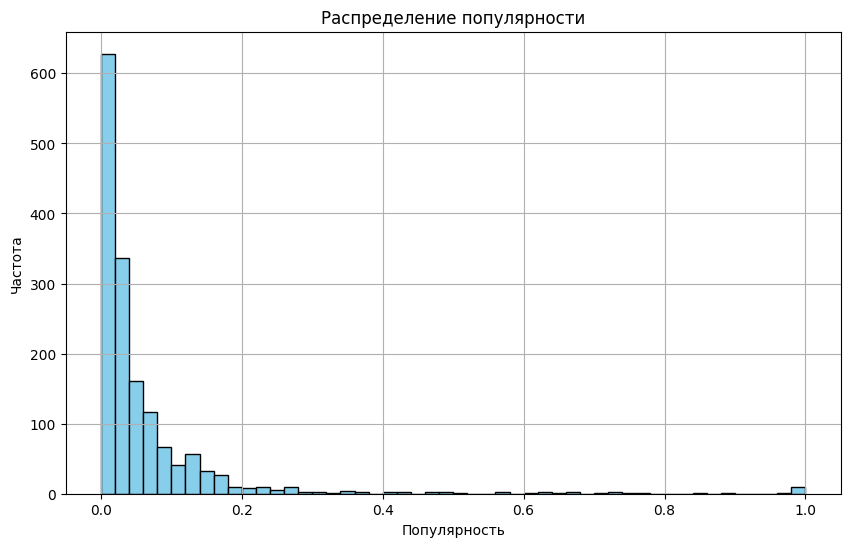

In [9]:
params = {'color': 'skyblue', 'edgecolor': 'black', 'linewidth': 1}

data['popularity'].hist(bins=50, figsize=(10, 6), **params)
plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.title('Распределение популярности')
plt.show()

Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.

При желании для `popularity` вы можете использовать свой способ шкалирования признаков с несимметричным распределением.


Здесь я решила подобрать наилучший параметрр M, при котором коэффициент ассиметрии (вычисляется с помощью метода `skew()`) будет наиболее близок к 0

Значения M я ищу в диапазоне от 100 до 10000 с шагом 100

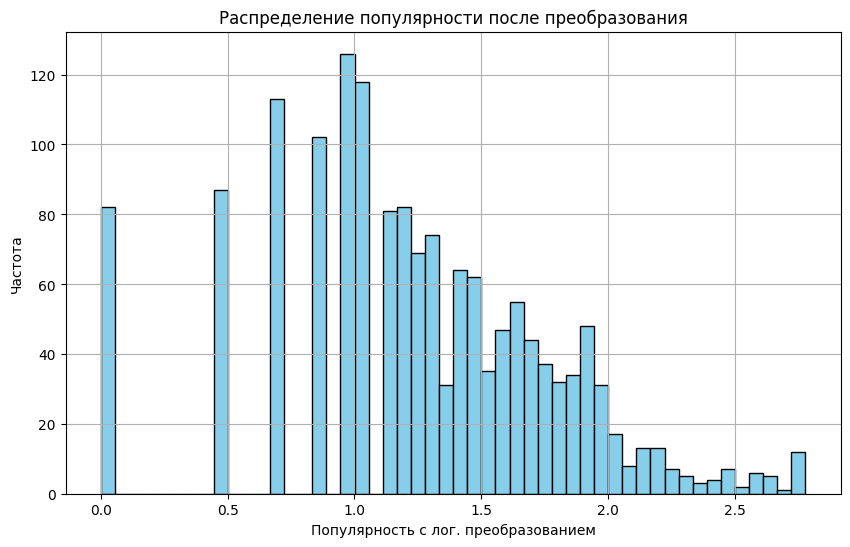

0.0049091625333475076
600


In [10]:
min_skew = 1000
M_value = 100
for M in range(100, 10000, 100):
  data['popularity_log'] = np.log10(data["popularity"] * M + 1)
  if abs(data['popularity_log'].skew()) < abs(min_skew):
    min_skew = data['popularity_log'].skew()
    M_value = M

data['popularity'] = np.log10(data["popularity"] * M_value + 1)
data['popularity'].hist(bins=50, figsize=(10, 6), **params)

data = data.drop(columns='popularity_log')
plt.xlabel(f'Популярность с лог. преобразованием')
plt.ylabel("Частота")
plt.title("Распределение популярности после преобразования")
plt.show()
print(f"{min_skew}")
print(M_value)


Итого он получается равен 600 (в дальнейшем я буду его использовать при редактировании тестовых данных)

##### Признак **numDeadRelations**

Теперь давайте обработаем **признак numDeadRelations**.
Посмотрите на частотное распределение этого признака. Лишь для малого числа персонажей `numDeadRelations>0`.

Создайте признак `boolDeadRelations`. Давайте упростим признак `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

In [11]:
data['numDeadRelations'].value_counts().sort_index()

,count
numDeadRelations,
0,1488
1,24
2,4
3,4
4,7
5,10
6,3
7,7
8,2


In [12]:
data['boolDeadRelations'] = [True if current_row > 0 else False for current_row in data['numDeadRelations']]
data['boolDeadRelations']

,boolDeadRelations
S.No,
1,True
2,True
3,False
4,False
5,False
...,...
1553,False
1554,False
1555,False


In [13]:
data = data.drop(columns='numDeadRelations')

##### Признак **age**

Наконец, давайте посмотрим на **признак age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, age_value принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:    

Также саму переменную age можно удалить, так как теперь она нам не нужна

In [14]:
# проходимся по столбцу, и если значение не NaN, то записываем x, иначе 0
data['age_value'] = [x if not np.isnan(x) else 0 for x in data['age']]
data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

In [15]:
data['age_value']

,age_value
S.No,
1,0.0
2,97.0
3,0.0
4,23.0
5,29.0
...,...
1553,0.0
1554,0.0
1555,0.0


In [16]:
data['age_no_data']

,age_no_data
S.No,
1,1
2,0
3,1
4,0
5,0
...,...
1553,1
1554,1
1555,1


In [17]:
print("Age value statistics:")
print(data['age_value'].describe())
print("\nAge no data distribution:")
print(data['age_no_data'].value_counts())

Age value statistics:
count    1557.000000
mean        6.323699
std        17.535217
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: age_value, dtype: float64

Age no data distribution:
age_no_data
1    1278
0     279
Name: count, dtype: int64


In [18]:
data = data.drop(columns='age')

Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

##### Признак **dateOfBirth**

Если вы заходите похожим образом образом обработать признак `dateOfBirth`, **обратите внимание**, что у одних и тех же персонажей не указан и возраст, и год рождения.
То есть созданные признаки `age_no_data` и `dateOfBirth_no_data` будут полностью совпадать, и в модель надо будет включать только один из признаков: или `age_no_data`, или `dateOfBirth_no_data`.

Я хочу оставить `age_no_data`, и по аналогии создать переменную `dateOfBirth_value`

Пусть там будет значение даты рождения, если оно есть и значение -100, если его нет. Нам важно записать какое-то "невозможное", минимальное или максимальное, значение из всех возможных для того, чтобы модель при обучении видела сильный разрыв с обычными данными

dateOfBirth на нашем тренировочном датасете имеет значения от -25 до 299, поэтому я выбрала -100, а не 0, как в случае возраста


In [19]:
data['dateOfBirth_value'] = [x if not np.isnan(x) else -100 for x in data['dateOfBirth']]
data['dateOfBirth_value']

,dateOfBirth_value
S.No,
1,-100.0
2,208.0
3,-100.0
4,82.0
5,276.0
...,...
1553,-100.0
1554,-100.0
1555,-100.0


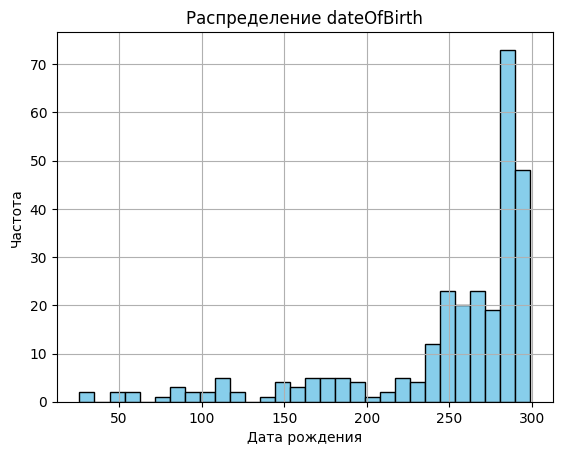

In [20]:
data[data['dateOfBirth_value'] > 0]['dateOfBirth_value'].hist(bins=30, **params)
plt.title('Распределение dateOfBirth')
plt.xlabel('Дата рождения')
plt.ylabel('Частота')

plt.show()

In [21]:
data = data.drop(columns='dateOfBirth')

#### **Задание 1.5.** Категориальные признаки с большим количеством категорий

Здесь мы обработаем переменные **name, title, culture, mother, father, heir, spouse, house**
Категориальные, которые попали в числовые, их мы обработаем позже: **isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse**

##### Признак **culture**

In [22]:
categorical_columns = [column for column in data.columns if data[column].dtype == 'O']
categorical_columns

['name', 'title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse']

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [23]:
data['culture'].value_counts(dropna = False)

,count
culture,
NaN,1069
Northmen,94
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Ghiscari,17
Dornish,17
Dothraki,17


Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

In [24]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

In [25]:
params = {'color': 'skyblue', 'edgecolor': 'black', 'linewidth': 1}

**Обратите внимание, что некоторые варианты названий народов встречаются только в тестовых данных, и не встречаются в обучающих данных.** Такая ситуация нередко случается на практике. Поэтому, после обработки обучающих данных и обучения модели важно задать для модели правило, как она должна обрабатывать "незнакомые" категории в категориальных признаках. Например, можно относить объекты с "незнакомой" категорией к некоторой существующей категории или указать формулу расчета для "незнакомой" категории.     

Предложенный вам словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

In [26]:
cultures_grouped_inverted = {}
for k in cultures_grouped.keys():
  for v in cultures_grouped[k]:
      cultures_grouped_inverted.update({v:k})

cultures_grouped_inverted

{'valyrian': 'Old Nations',
 'first men': 'Old Nations',
 'andal': 'Old Nations',
 'andals': 'Old Nations',
 'rhoynar': 'Old Nations',
 'northmen': 'the North',
 'northern mountain clans': 'the North',
 'crannogmen': 'the North',
 'ironborn': 'the Iron Islands',
 'ironmen': 'the Iron Islands',
 'valemen': 'the Mountain and the Vale',
 'vale': 'the Mountain and the Vale',
 'vale mountain clans': 'the Mountain and the Vale',
 'sistermen': 'the Mountain and the Vale',
 'riverlands': 'the Isles and Rivers',
 'rivermen': 'the Isles and Rivers',
 'westerman': 'the Rock',
 'westermen': 'the Rock',
 'westerlands': 'the Rock',
 'stormlander': 'the Stormlands',
 'stormlands': 'the Stormlands',
 'reach': 'the Reach',
 'reachmen': 'the Reach',
 'the reach': 'the Reach',
 'dornish': 'Dorne',
 'dornishmen': 'Dorne',
 'dorne': 'Dorne',
 'astapor': 'Essos Nations',
 'astapori': 'Essos Nations',
 'braavosi': 'Essos Nations',
 'braavos': 'Essos Nations',
 'tyroshi': 'Essos Nations',
 'lysene': 'Essos Na

Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()`

In [27]:
data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)
data['culture_grouped']

,culture_grouped
S.No,
1,NaN
2,the Isles and Rivers
3,NaN
4,NaN
5,Dorne
...,...
1553,NaN
1554,NaN
1555,NaN


Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

In [28]:
data['culture_grouped'] = data['culture_grouped'].fillna('culture_no_data')
data['culture_grouped'].value_counts()


,count
culture_grouped,
culture_no_data,1069
Essos Nations,109
the North,108
the Iron Islands,95
Other Nations,57
Old Nations,32
the Mountain and the Vale,25
Dorne,21
the Rock,14


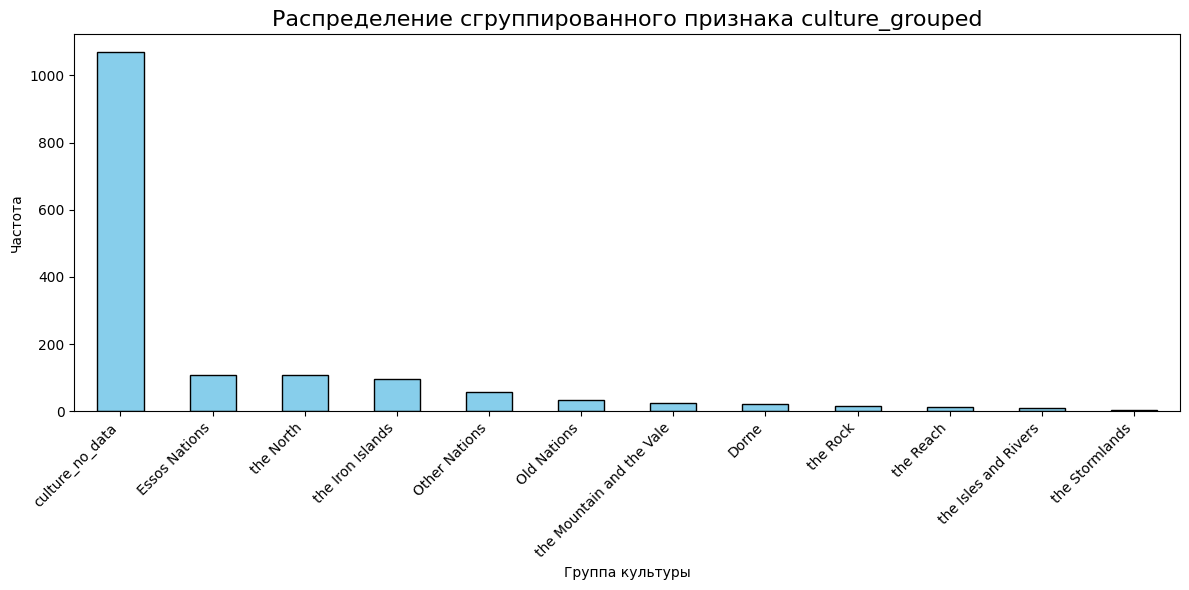

In [30]:
plt.figure(figsize=(12, 6))
data['culture_grouped'].value_counts().plot(kind='bar', **params)
plt.title('Распределение сгруппированного признака culture_grouped', fontsize=16)
plt.xlabel('Группа культуры')
plt.ylabel('Частота')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Теперь можем удалить признак culture

In [31]:
data = data.drop(columns='culture')

Распределение сгруппированной переменной выглядит гораздо лучше. Но по прежнему есть несколько слабо представленых групп.

Дальнейшую работу с этим признаком проводите на свое усмотрение для повышения качества прогноза модели. Например, можно объединить несколько слабо представленных категорий в одну или применить другой подход.

##### Признак **title**

Давайте поработаем с переменной **title**. Какие у нее есть уникальные значения и в каком количестве?

In [32]:
data['title'].value_counts(dropna = False).head(15)

,count
title,
NaN,840
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
Winterfell,15
Lady,10
King in the North,9


In [33]:
data['title'].unique()

array([nan, 'Lord of the Crossing', 'Ser', 'Queen', 'Greenstone',
       'Hand of the King', 'Archmaester', 'Maester', 'Khal', 'red hand',
       'Castellan', 'Seven Kingdoms', 'PrincessQueen',
       'Lord of the Iron Islands', 'Lord', 'Brother', 'Lord of Coldmoat',
       'Prince of Dragonstone', 'Lady', 'PrincessSepta', 'Princess',
       'Septa', 'Grand Maester', 'Septon', 'King', 'Seneschal',
       'Bloodrider', 'Stokeworth', 'Prince', 'LadyQueenDowager Queen',
       'Lord of the Tides', 'Lord of Dragonstone', 'Goodman', 'Wisdom',
       'King in the North', 'Winterfell', 'Steward', 'Eyrie',
       'Casterly Rock', 'Cupbearer', 'Hornwood',
       'Lord Steward of the Iron Islands', 'Blue Grace', 'Red Priest',
       'Khalakka', 'Good Master', 'QueenBlack Bride', 'Last Hearth',
       'Lord Paramount of the Mander', 'Seagard', 'Goodwife', 'Uplands',
       'BrotherProctor', 'Coldmoat', 'Ashford', 'Wind Witch', 'LadyQueen',
       'Broad Arch', 'Brightwater', 'Lady Marya', 'Blackc

Мы видим, что очень много разных титулов, которых мало по количеству (несколько штук). Поэтому мы можем аналогичным образом (как с признаком culture) сделать группы больше

Давайте посмотрим какие титулы есть в тестовых данных и нет в тренировочных? Их мы тоже должны добавить в словарь

В целом, у нас обычно нет такой возможности, и тогда незнакомые титулы из тестовых данных я бы отправила в title_no_data, но здесь решила запариться и объединить их

In [34]:
train_titles = data['title'].dropna().unique()

test_titles = test['title'].dropna().unique()

# титулы, которые есть в тестовом, но нет в обучающем датасете
unique_test_titles_not_in_train = set(test_titles) - set(train_titles)

len(unique_test_titles_not_in_train)

67

Титулы группировались, основываясь на

*   **Иерархии и влиянии**, благодаря этому можно понять связан ли уровень влияния с выживаемостью. Тем более титул напрямую связан с иерархией и влиянием
*   **Ролью в обществе**, некоторые титулы указывают на роль в обществе (правители, военные, религиозные лидеры и тд). Такие роли могут быть связаны с уровнем опасности, с которым сталкивается персонаж
*   **Религиозной принадлежности**

In [35]:
titles_grouped = {
    'Royal/High Nobility': ['king', 'queen', 'prince', 'princess', 'lord',
                            'lady', 'hand of the king', 'lord of the crossing',
                            'lord of the iron islands', 'prince of dragonstone',
                            'lord of coldmoat', 'lord of the tides','lord of dragonstone',
                            'king in the north', 'lord steward of the iron islands',
                            'lord paramount of the mander', 'lord of the red dunes',
                            'lord reaper of pyke', 'lord seneschal', 'high steward of highgarden',
                            "lord commander of the night's watch", 'king of the andals',
                            'lord of the snakewood', 'lord of crows nest', 'lord of the deep den',
                            "widow's watch", 'lord of darry', 'prince of dorne',
                            'lord paramount of the trident', 'lord of pebbleton', 'lord of atranta',
                            'lord of oldcastle', 'lord of southshield', 'king of the iron islands',
                            'lord of the ten towerslord harlaw of harlawharlaw of harlaw',
                            'lord of the tor', 'lord of iron holt', 'lord of honeyholt',
                            'protector of the realm', 'lady of darry', 'prince of winterfell',
                            'king of astapor', 'lord of kingsgrave', 'lord of starfall',
                            'master of deepwood motte', 'lord of hellholt', 'lord of harrenhal',
                            'lord of the seven kingdoms', 'queendowager queen', 'lord of blackhaven',
                            'lord of hammerhorn', "storm's end", 'lord paramount of the stormlands',
                            'prince of winterfellheir to winterfell', 'the crossing', 'lady of the vale',
                            'lord of oakenshield', 'lordwisdom', 'lady of the leaves', 'lord steward',
                            'castellan of harrenhal', 'oakenshield', 'the norreylord norrey',
                            'keeper of the gates of the moon', 'lord of the hornwood', 'lord of white harbor',
                            'princessqueendowager queen', 'prince of the narrow sea', "lord of griffin's roost"],
    'Lower Nobility/Military': ['ser', 'castellan', 'goodman', 'steward', 'cupbearer',
                                'knight', 'captain', 'master-at-arms', 'captain of the guard',
                                'commander of the second sons', 'commander of the city watch',
                                'sercastellan of casterly rock', 'captain-general'],
    'Religious Titles': ['archmaester', 'maester', 'brother', 'septa', 'grand maester',
                         'septon', 'red priest', 'brotherproctor', 'chief undergaoler',
                         'undergaoler', 'godswife', 'high septon', "slave of r'hllor", 'green grace'],
    'Small Council Titles': ['master of coin', 'mistress of whisperers', 'master of coin',
                             'master of ships', 'master of whisperers', 'master of whisperers'],
    'Free Cities/Essos Titles': ['khal', 'red hand', 'bloodrider', 'blue grace',
                                 'khalakka', 'good master', 'queenblack bride',
                                 'wind witch', 'sealord', 'magister of pentos', 'first sword of braavos', 'tradesman-captain',
                                 'black wind', 'magister'],
    'Other/Regional Titles': ['greenstone', 'seven kingdoms', 'princessqueen',
                              'goodwife', 'uplands', 'coldmoat', 'ashford', 'broad arch',
                              'brightwater', 'blackcrown', 'golden tooth', 'whitewalls',
                              'hornvale', 'claw isle', 'ironoaks', 'bitterbridge',
                              'strongsong', 'goldengrove', 'harridan hill', 'lord of sunflower hall',
                              'lord of the marches', 'pinkmaiden', 'cerwyn', 'godsgrace',
                              'duskendale', 'sharp point', 'riverrun', "lady of torrhen's square",
                              'grassy vale', 'longbow hall', 'hayford', 'dyre den',
                              'skyreach', 'feastfires', 'stonehelm', 'king-beyond-the-wall',
                              'crag', 'gulltown', 'sweetsister', 'starpike', 'sweetport sound',
                              'lord of greyshield', 'felwood', 'goldgrass', 'redfort',
                              'tower of glimmering', 'big bucketthe wull', 'first ranger',
                              "karl's hold", 'blackmont', 'castle lychester', 'wraith',
                              "heart's home", 'harrenhal', 'oarmaster', 'volmark',
                              'greenshield', 'shatterstone', 'ghost hill', 'yronwood',
                              'khalko (formerly)', 'banefort', 'hightower', 'sandstone',
                              'serthe knight of saltpans', 'castellancommander',
                              'wyndhall', 'runestone', "lord of flint's finger", 'rills',
                              'longsister', "knight of griffin's roost", 'cobblecat',
                              'coldwater burn', 'lordsport', 'fair isle', 'master of harlaw hall',
                              "rook's rest", 'crakehall', 'deepwood motte', 'kayce',
                              'acorn hall', 'ten towers', 'three towers', 'the liddlelord liddle',
                              'salt shore', 'sealskin point', 'three sisters', 'grey glen',
                              'dragonstone', 'maidenpool', 'karhold', 'nightsong',
                              'light of the west', 'eastwatch-by-the-sea', 'foamdrinker',
                              'red flower vale', 'rain house', 'highgarden', 'winterfell',
                              'eyrie', 'casterly rock', 'hornwood', 'last hearth', 'seagard',
                              'green lands', 'ruddy hall', 'warlock', 'haystack hall', 'darry',
                             'old oak', 'sunspear', 'iron islands', 'golden storm', 'greywater watch',
                             'bear island', 'magnar of thenn', 'stone hedge', 'blacktyde', 'twins',
                             'sandship', 'old wyk', 'lonely light', 'arbor', 'vaith', 'barrowton',
                             'raventree hall', 'the dreadfort', 'dreadfort', 'horn hill', 'longtable',
                             'harlaw', 'red jester'],
}


titles_grouped_inverted = {}
for k in titles_grouped.keys():
  for v in titles_grouped[k]:
      titles_grouped_inverted.update({v:k})


In [36]:
data['title_grouped'] = data['title'].str.lower().map(titles_grouped_inverted)
data['title_grouped'] = data['title_grouped'].fillna('title_no_data')

data['title_grouped'].value_counts(dropna=False)

,count
title_grouped,
title_no_data,852
Lower Nobility/Military,326
Other/Regional Titles,150
Royal/High Nobility,116
Religious Titles,88
Free Cities/Essos Titles,20
Small Council Titles,5


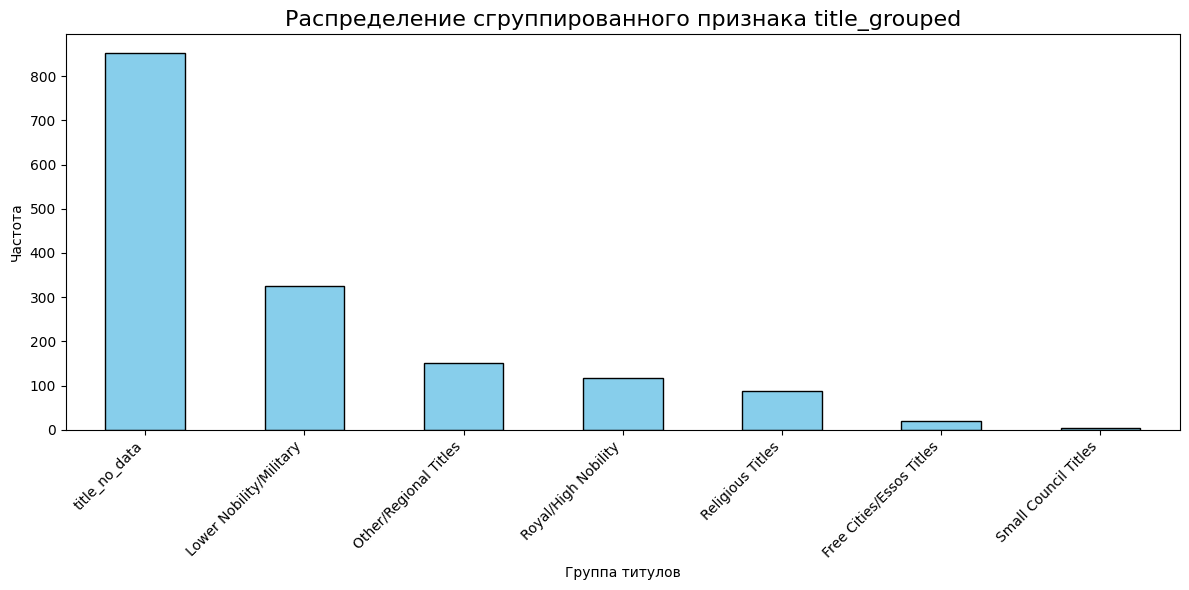

In [37]:
plt.figure(figsize=(12, 6))
data['title_grouped'].value_counts().plot(kind='bar', **params)
plt.title('Распределение сгруппированного признака title_grouped', fontsize=16)
plt.xlabel('Группа титулов')
plt.ylabel('Частота')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Теперь наши группы выглядят лучше и можно удалить изначальный признак

In [38]:
data = data.drop(columns='title')

##### Признаки **mother, father, heir, spouse**

In [39]:
data['mother'].value_counts(dropna = False)

,count
mother,
NaN,1539
Rhaenyra Targaryen,2
Cersei Lannister,2
Alyssa Targaryen,1
Visenya Targaryen,1
Catelyn Stark,1
Cassana Estermont,1
Valaena Velaryon,1
Alicent Hightower,1


In [40]:
data['father'].value_counts(dropna = False)

,count
father,
NaN,1535
Daemon Targaryen,2
Robert Baratheon,2
Aegon I Targaryen,2
Baelon Targaryen,1
Eddard Stark,1
Steffon Baratheon,1
Tristifer IV Mudd,1
Aerion Targaryen,1


In [41]:
data['heir'].value_counts(dropna = False)

,count
heir,
NaN,1536
Jaehaerys Targaryen,2
Aegon IV Targaryen,1
Rhaenyra Targaryen,1
Myrcella Baratheon,1
Tommen Baratheon,1
Bran Stark,1
Shireen Baratheon,1
Aenys Targaryen,1


In [42]:
data['spouse'].value_counts(dropna = False)

,count
spouse,
NaN,1357
Walder Frey,6
Craster,4
Alys Arryn,2
Kiera of Tyrosh,2
...,...
Glover,1
Bronn,1
Jorah Mormont,1


Мы видим, что у всех этих признаков мало уникальных значений и очень очень много пропусков. Модель на таких данных нормально не сможет обучиться, а только переобучится, поэтому давайте введем признаки `has_mother`, `has_father`, `has_spouse`, `has_heir`

Если имя такого родственника указано, то будет ставиться 1, иначе 0

In [43]:
data['has_mother'] = [1 if not pd.isna(x) else 0 for x in data['mother']]
data['has_father'] = [1 if not pd.isna(x) else 0 for x in data['father']]
data['has_spouse'] = [1 if not pd.isna(x) else 0 for x in data['spouse']]
data['has_heir'] = [1 if not pd.isna(x) else 0 for x in data['heir']]

Проверим правильно ли получилось

In [44]:
data['has_mother']

,has_mother
S.No,
1,1
2,0
3,0
4,0
5,0
...,...
1553,0
1554,0
1555,0


In [45]:
data['mother']

,mother
S.No,
1,Rhaenyra Targaryen
2,NaN
3,NaN
4,NaN
5,NaN
...,...
1553,NaN
1554,NaN
1555,NaN


Теперь эти признаки можно удалить

In [46]:
data = data.drop(columns=['mother', 'father', 'heir', 'spouse'])

##### Признаки **isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse**

Совместно с этимнам нужно задуматься о том, что делать с признаками `isMotherAlive`, `isFatherAlive` и т.д., ведь там тоже есть пропуски

Здесь можно использовать one-hot encoding. У нас будет 3 новые бинарные переменные:

*   **isAliveMother_0**
*   **isAliveMother_1**
*   **isAliveMother_Unknown**


In [47]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

is_alive_features = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']

# заполним NaN строкой 'Unknown'
for feature in is_alive_features:
    data[feature] = data[feature].fillna('Unknown')
    data[feature] = data[feature].astype(str)


# применяем OneHotEncoder
# handle_unknown='ignore' добавляем на случай, если вдруг в тестовом датасете появится новое уникальное значение.
ohe_is_alive = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# обучаем кодировщик
data_is_alive_encoded = ohe_is_alive.fit_transform(data[is_alive_features])

# cоздаем dataframe
encoded_is_alive_columns = ohe_is_alive.get_feature_names_out(is_alive_features)

data_is_alive_encoded_df = pd.DataFrame(data_is_alive_encoded, index=data.index, columns=encoded_is_alive_columns)

data = pd.concat([data, data_is_alive_encoded_df], axis=1)

In [48]:
data = data.drop(columns=is_alive_features)

data.head()

,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,...,isAliveMother_Unknown,isAliveFather_0.0,isAliveFather_1.0,isAliveFather_Unknown,isAliveHeir_0.0,isAliveHeir_1.0,isAliveHeir_Unknown,isAliveSpouse_0.0,isAliveSpouse_1.0,isAliveSpouse_Unknown
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,1,NaN,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,Walder Frey,1,House Frey,1,1,1,1,1,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
5,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


##### Признак **house**

In [49]:
data['house'].value_counts(dropna = False)

,count
house,
NaN,381
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40
...,...
House Harlaw of Grey Garden,1
Summer Islands,1
House Condon,1


Здесь у нас не слишком много неизвестных значений и много уникальных, поэтому можно не отказываться от данных, а просто заполнить неизвестные значения как `House_no_data`

In [50]:
data['house'] = data['house'].fillna('House_no_data')
data['house'].value_counts(dropna=False).head()

,count
house,
House_no_data,381
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40


Но! В дальнейшем (задание 1.6.) нам нужно будет думать как видоизменять эти данные: тут слишком много уникальных значений, чтобы применять one-hot encoder, поэтому раскидаем их по группам также, как и с culture и title

In [51]:
house_counts = data['house'].value_counts(dropna=False)
house_counts.head(20)

# порог для редких домов
rare_house_threshold = 10

frequent_houses = house_counts[house_counts >= rare_house_threshold].index.tolist()
frequent_houses


['House_no_data',
 'House Frey',
 "Night's Watch",
 'House Stark',
 'House Targaryen',
 'House Lannister',
 'House Tyrell',
 'House Greyjoy',
 'House Osgrey',
 'Faith of the Seven',
 'House Botley',
 'House Hightower',
 'House Martell',
 'House Arryn',
 'House Florent',
 'House Crakehall']

Если дом входит в список частых домов, оставляем его название
'House_no_data' обрабатываем отдельно, а наче, присваиваем 'Rare House'

In [52]:
data['house_grouped'] = data['house'].apply(lambda x: x if x in frequent_houses else ('House_no_data' if x == 'House_no_data' else 'Rare House'))
data['house_grouped'].value_counts(dropna=False)


,count
house_grouped,
Rare House,703
House_no_data,381
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40
House Lannister,36
House Tyrell,33
House Greyjoy,30


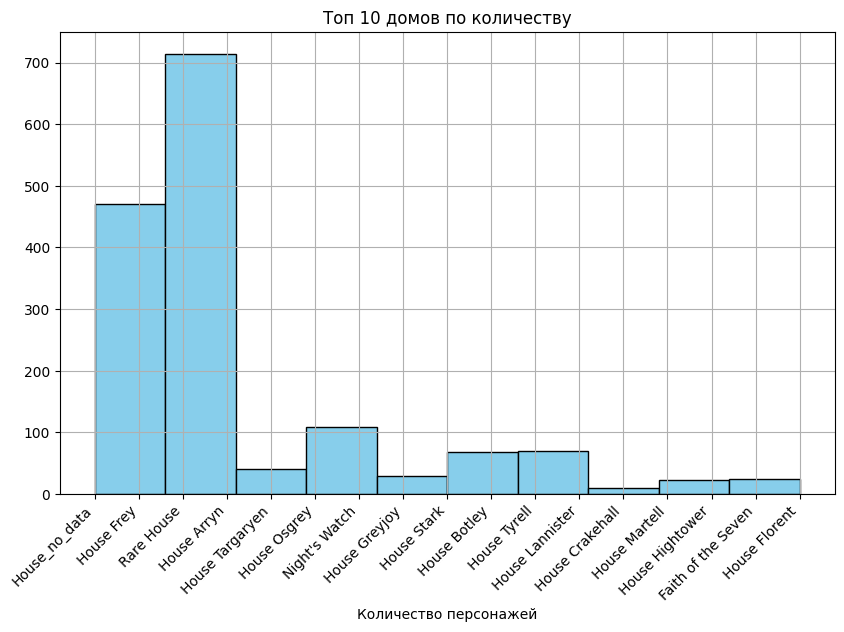

In [53]:
data['house_grouped'].hist(figsize=(10, 6), **params)
plt.title('Топ 10 домов по количеству')
plt.xlabel('Количество персонажей', )

plt.xticks(rotation=45, ha='right')
plt.show()

In [54]:
data = data.drop(columns='house')

##### Признак **name**

Данный признак нам не нужен, поскольку имена это по сути как уникальный идентификатор и на таких данных модель лучше не обучать

In [55]:
data = data.drop(columns = 'name')

#### **Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Чтобы посмотреть количество уникальных значений для всех столбцов, можно воспользоваться методом nunique() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)

In [56]:
# Количество уникальнх значений в каждом столбце
data.nunique()

,0
male,2
book1,2
book2,2
book3,2
book4,2
book5,2
isMarried,2
isNoble,2
popularity,117
isAlive,2


In [57]:
data.describe(include = ['int64', 'float64']).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique())

,count,min,max,N_unique_values
male,1557.0,0.0,1.000000,2
book1,1557.0,0.0,1.000000,2
book2,1557.0,0.0,1.000000,2
book3,1557.0,0.0,1.000000,2
book4,1557.0,0.0,1.000000,2
book5,1557.0,0.0,1.000000,2
isMarried,1557.0,0.0,1.000000,2
isNoble,1557.0,0.0,1.000000,2
popularity,1557.0,0.0,2.778874,117
isAlive,1557.0,0.0,1.000000,2


Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

Для бинарных признаков их связь с зависимой переменной можно прикинуть по таблице корреляций. Для категориальных признаков с количеством значений больше двух (или с двумя значениями и NaN) можно сделать one-hot преобразования и посчитать корреряцию зависимой переменной с набором сгенерированных бинарных признаков.
В качестве альтернативного подхода можно использовать сравнение средних значений зависимой переменной для разных категорий исследуемого признака. Чем сильнее различаются средние значения целевой переменной между категориями, тем вероятнее, что данный признак связан с зависимой переменной.

Для лучшего обучения модели отмасштабируем наши числовые признаки

In [58]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['popularity', 'age_value', 'dateOfBirth_value']

scaler_standard = StandardScaler()
data[numerical_features] = scaler_standard.fit_transform(data[numerical_features])

data[numerical_features].head()


,popularity,age_value,dateOfBirth_value
S.No,,,
1,2.420976,-0.360744,-0.458588
2,2.729961,5.172758,1.809386
3,1.779481,-0.360744,-0.458588
4,1.486052,0.951323,0.881578
5,0.370522,1.293602,2.310107


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   male                   1557 non-null   int64  
 1   book1                  1557 non-null   int64  
 2   book2                  1557 non-null   int64  
 3   book3                  1557 non-null   int64  
 4   book4                  1557 non-null   int64  
 5   book5                  1557 non-null   int64  
 6   isMarried              1557 non-null   int64  
 7   isNoble                1557 non-null   int64  
 8   popularity             1557 non-null   float64
 9   isAlive                1557 non-null   int64  
 10  boolDeadRelations      1557 non-null   bool   
 11  age_value              1557 non-null   float64
 12  age_no_data            1557 non-null   int64  
 13  dateOfBirth_value      1557 non-null   float64
 14  culture_grouped        1557 non-null   object 
 15  title_gro

In [60]:
# попробуйте провести сравнение средних зависимой пременной isAlive для признака isAliveSpouse
# одним из приведенных ниже способов:

# data.groupby('НАЗВАНИЕ ПРИЗНАКА', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveSpouse_0.0', aggfunc=['mean', 'count'], dropna=False)

,mean,count
,isAlive,isAlive
isAliveSpouse_0.0,,
0.0,0.782838,1515
1.0,0.619048,42


Много данных отсутствует, так что выводов особо не сделаешь:

In [61]:
pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveFather_Unknown', aggfunc=['mean', 'count'], dropna=False)


,mean,count
,isAlive,isAlive
isAliveFather_Unknown,,
0.0,0.272727,22
1.0,0.785668,1535


Применим One-Hot Encoding к сгруппированным категориальным признакам `culture_grouped`, `title_grouped`, а также к `house_grouped` так как они имеют более двух уникальных значений.

In [62]:
from sklearn.preprocessing import OneHotEncoder

# handle_unknown='ignore' позволяет обрабатывать неизвестные категории в тестовых данных
ohe_grouped = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

data_categorical = data[['culture_grouped', 'title_grouped', 'house_grouped']]
data_encoded = ohe_grouped.fit_transform(data_categorical)

encoded_columns = ohe_grouped.get_feature_names_out(['culture_grouped', 'title_grouped', 'house_grouped'])
data_encoded_df = pd.DataFrame(data_encoded, index=data.index, columns=encoded_columns)



In [63]:
data = data.drop(columns=['culture_grouped', 'title_grouped', 'house_grouped'])
data = pd.concat([data, data_encoded_df], axis=1)

data.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,popularity,isAlive,...,house_grouped_House Hightower,house_grouped_House Lannister,house_grouped_House Martell,house_grouped_House Osgrey,house_grouped_House Stark,house_grouped_House Targaryen,house_grouped_House Tyrell,house_grouped_House_no_data,house_grouped_Night's Watch,house_grouped_Rare House
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,2.420976,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,1,1,1,1,1,1,2.729961,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,1,0,0,1,1.779481,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0,0,0,0,1,1,1.486052,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,1,0,1,1,0.370522,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### **Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

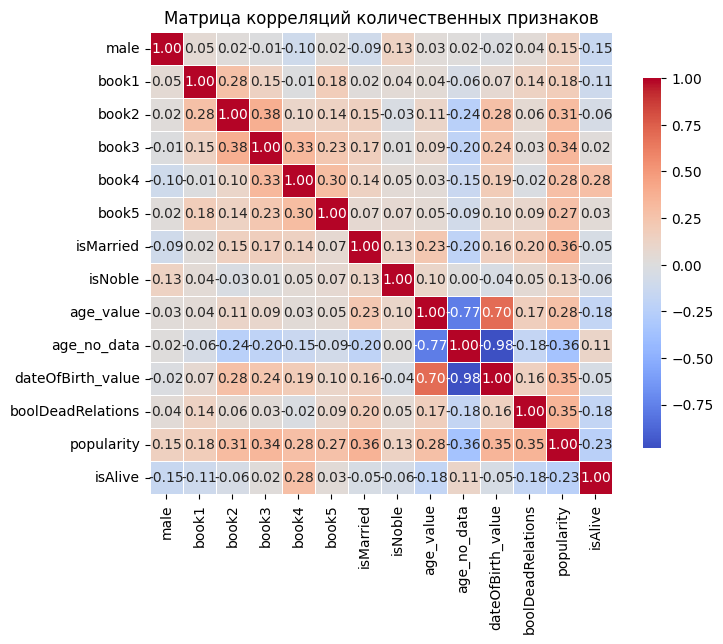

In [65]:
quantitative_features = [
    'male', 'book1', 'book2', 'book3', 'book4', 'book5',
    'isMarried', 'isNoble',
    'age_value', 'age_no_data', 'dateOfBirth_value',
    'boolDeadRelations', 'popularity',
    'isAlive'
]

correlation_matrix = data[quantitative_features].corr()

plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций количественных признаков')
plt.show()

У нас есть умеренно сильная корреляция между `age_value` с `age_no_data` и `dateOfBirth_value` ,  что логично, ведь возраст, данные о возрасте и дата рождения связаны. Поэтому можно убрать один из признаков, например `dateOfBirth_value`, так как у него наибольшая корреляция с одним из оставшихся прищнаков

У признаков `popularity` и `age_value` слабая положительная корреляция, также как у `popularity` и `dateOfBirth_value`

In [67]:
data.drop('dateOfBirth_value', axis = 1, inplace = True)

##### Поработаем с тестовыми данными

Также у нас есть ненормальные значения, которые нам нужно отредактировать

In [69]:
test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

In [70]:
test.describe(include = ['int64', 'float64']).T[['count', 'min', 'max']]

# исправим неадекватные значения age и dateOfBirth в тестовом датасете
# замены в строке 1685: dateOfBirth -> 278. и age -> 0.
test.loc[1685, 'dateOfBirth'] = 278.
test.loc[1685, 'age'] = 0.
# замены в строке 1869: dateOfBirth -> 299. и age -> 0.
test.loc[1869, 'dateOfBirth'] = 299.
test.loc[1869, 'age'] = 0.

In [71]:
# popularity
test['popularity'] = np.log10(test["popularity"] * 600 + 1)

# numDeadRelations
test['boolDeadRelations'] = [True if current_row > 0 else False for current_row in test['numDeadRelations']]
test = test.drop(columns='numDeadRelations')

#  age
test['age_value'] = [x if not np.isnan(x) else 0 for x in test['age']]
test['age_no_data'] = [1 if np.isnan(x) else 0 for x in test['age']]
test = test.drop(columns='age')

#dateOfBirth
test['dateOfBirth_value'] = [x if not np.isnan(x) else -100 for x in test['dateOfBirth']]
test = test.drop(columns='dateOfBirth')

# сulture
test['culture_grouped'] = test['culture'].str.lower().map(cultures_grouped_inverted)
test['culture_grouped'] = test['culture_grouped'].fillna('culture_no_data')
test = test.drop(columns='culture')

# title
test['title_grouped'] = test['title'].str.lower().map(titles_grouped_inverted)
test['title_grouped'] = test['title_grouped'].fillna('title_no_data')
test = test.drop(columns='title')

# mother, father, heir, spouse
test['has_mother'] = [1 if not pd.isna(x) else 0 for x in test['mother']]
test['has_father'] = [1 if not pd.isna(x) else 0 for x in test['father']]
test['has_spouse'] = [1 if not pd.isna(x) else 0 for x in test['spouse']]
test['has_heir'] = [1 if not pd.isna(x) else 0 for x in test['heir']]
test = test.drop(columns=['mother', 'father', 'heir', 'spouse'])

# isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse using OneHotEncoder
is_alive_features = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']

# заполним NaN строкой 'Unknown'
for feature in is_alive_features:
    test[feature] = test[feature].fillna('Unknown')

    test[feature] = test[feature].astype(str)

data_is_alive_categorical_test = test[is_alive_features]

# преобразуем данные с использованием УЖЕ ОБУЧЕННОГО кодировщика
# ohe_is_alive был обучен на тренировочных данных
data_is_alive_encoded_test = ohe_is_alive.transform(data_is_alive_categorical_test)

# создаем dataframe из закодированных данных
encoded_is_alive_columns = ohe_is_alive.get_feature_names_out(is_alive_features)
data_is_alive_encoded_df_test = pd.DataFrame(data_is_alive_encoded_test, index=test.index, columns=encoded_is_alive_columns)

test = pd.concat([test, data_is_alive_encoded_df_test], axis=1)
test = test.drop(columns=is_alive_features)

# house
test['house_grouped'] = test['house'].apply(lambda x: x if x in frequent_houses else ('House_no_data' if x == 'House_no_data' else 'Rare House'))
test = test.drop(columns='house')

# удаление признака name
test = test.drop(columns = 'name')

# ohe для сгруппированных признаков culture, title и house
# Используем тот же encoder, обученный на тренировочных данных
data_categorical_test = test[['culture_grouped', 'title_grouped', 'house_grouped']]
data_encoded_test = ohe_grouped.transform(data_categorical_test)

encoded_columns_test = ohe_grouped.get_feature_names_out(['culture_grouped', 'title_grouped', 'house_grouped'])
data_encoded_df_test = pd.DataFrame(data_encoded_test, index=test.index, columns=encoded_columns_test)

test = test.drop(columns=['culture_grouped', 'title_grouped', 'house_grouped'])

test = pd.concat([test, data_encoded_df_test], axis=1)

# масштабирование
numerical_features = ['popularity', 'age_value', 'dateOfBirth_value']
test[numerical_features] = scaler_standard.transform(test[numerical_features]) # Use transform()
test.drop(['has_mother', 'dateOfBirth_value'], axis = 1, inplace = True)
test.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,popularity,boolDeadRelations,...,house_grouped_House Hightower,house_grouped_House Lannister,house_grouped_House Martell,house_grouped_House Osgrey,house_grouped_House Stark,house_grouped_House Targaryen,house_grouped_House Tyrell,house_grouped_House_no_data,house_grouped_Night's Watch,house_grouped_Rare House
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,0,0,0,0,1,0,0,0.479541,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1559,0,0,1,1,1,1,0,0,2.585219,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1560,0,0,0,1,1,0,0,0,-0.694897,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1561,1,1,1,1,1,1,0,1,1.628728,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1562,1,1,1,1,1,1,1,0,2.160683,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
test.describe(include = ['int64', 'float64']).T[['count', 'min', 'max']]

,count,min,max
male,389.0,0.0,1.0
book1,389.0,0.0,1.0
book2,389.0,0.0,1.0
book3,389.0,0.0,1.0
book4,389.0,0.0,1.0
...,...,...,...
house_grouped_House Targaryen,389.0,0.0,1.0
house_grouped_House Tyrell,389.0,0.0,1.0
house_grouped_House_no_data,389.0,0.0,0.0
house_grouped_Night's Watch,389.0,0.0,1.0


#### **Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

Посмотрим как признаки коррелируют с целевой переменной и построим матрицу корреляций

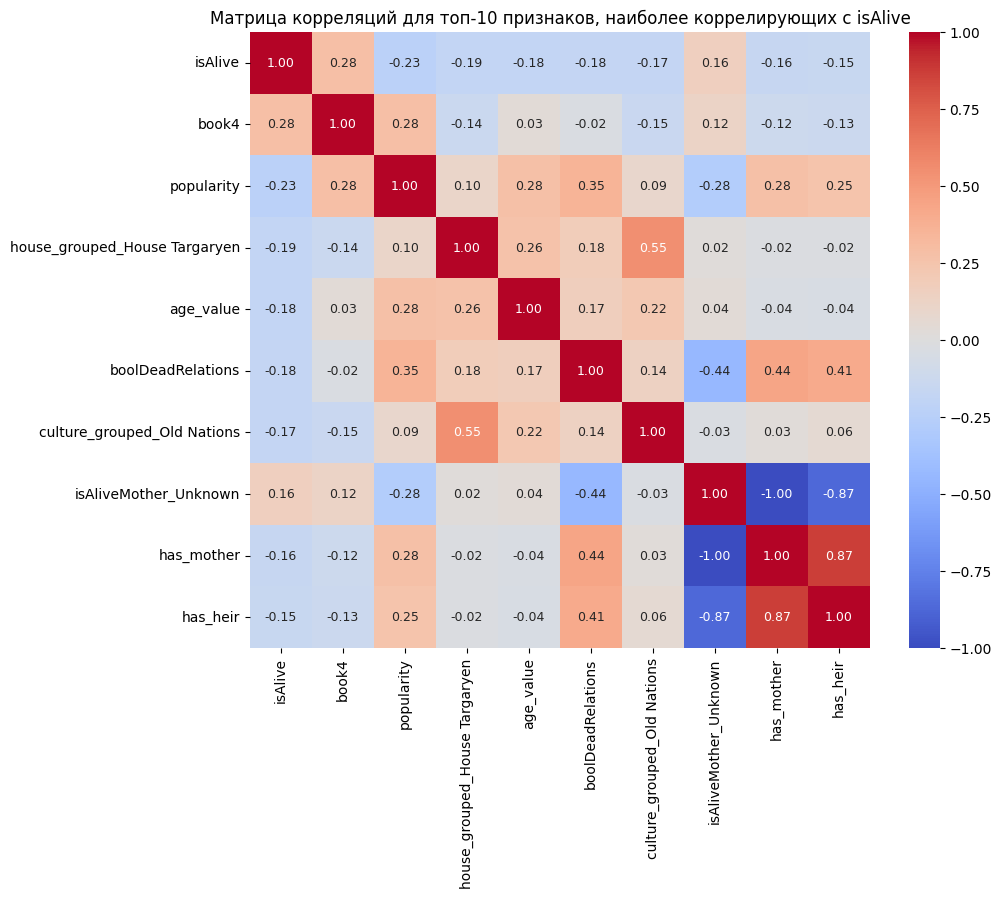

In [75]:
correlations_with_target = data.corr()['isAlive'].sort_values(ascending=False)

top_n_features = 10
most_correlated_features = correlations_with_target.abs().sort_values(ascending=False).head(top_n_features).index.tolist()

# Рассчитываем матрицу корреляций только для выбранных признаков
correlation_matrix_small_subset = data[most_correlated_features].corr()

# Визуализируем матрицу корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_small_subset, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 9})
plt.title(f'Матрица корреляций для топ-{top_n_features} признаков, наиболее коррелирующих с isAlive')
plt.show()

Видим, что некоторые признаки очень сильно коррелируют, удалим `has_mother`

In [76]:
data.drop('has_mother', axis = 1, inplace = True)

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [77]:
X = data.drop(columns=['isAlive'])
y = data['isAlive']

**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# не забудьте в функции train_test_split задать параметр random_state,
# чтобы обеспечить повторяемость разбиения выборки на train и validation части.
# Это позволит сравнивать метрики моделей с различными методами подготовки признаков

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

#### **Задание 2.1.** Выбор модели обучения


Вы можете работать с одной из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [82]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

####  **Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

**LogisticRegression**

In [84]:
from sklearn.model_selection import GridSearchCV

# Шаг 1. Создание модели LogisticRegression
logistic_regression = LogisticRegression(random_state=42)

param_grid = [
    {'C':np.arange(1, 5),
     'solver':['liblinear'],
     'penalty': ['l1', 'l2']
    },
    {'C':np.arange(1, 5),
     'solver':['lbfgs', 'newton-cg'],
     'penalty': ['l2']
    }
]

gridsearch = GridSearchCV(logistic_regression, param_grid, refit=True, scoring="accuracy")

# Шаг 2. Обучение модели на тренировочных данных
gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

logistic_regression = gridsearch.best_estimator_

{'C': np.int64(1), 'penalty': 'l2', 'solver': 'liblinear'}


**Random Forest**


In [85]:
random_forest = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators':np.arange(100, 150, 5)}

gridsearch = GridSearchCV(random_forest, param_grid, refit=True, scoring="accuracy")

# Шаг 2. Обучение модели на тренировочных данных
gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

random_forest = gridsearch.best_estimator_

{'n_estimators': np.int64(140)}


**AdaBoostClassifier**

In [88]:
ada_boost = AdaBoostClassifier(random_state=42)

param_grid = {'n_estimators':np.arange(100, 150, 10), 'learning_rate': [0.01, 0.1, 0.5, 1.0]}

gridsearch = GridSearchCV(ada_boost, param_grid, refit=True, scoring="accuracy")

# Шаг 2. Обучение модели на тренировочных данных
gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

ada_boost = gridsearch.best_estimator_

{'learning_rate': 1.0, 'n_estimators': np.int64(110)}


**GaussianProcessClassifier**

In [90]:
# Шаг 1. создание модели
gaussian_process = GaussianProcessClassifier()

# Шаг 2. обучение модели
gaussian_process.fit(X_train, y_train)


GaussianProcessClassifier()

**GaussianNB**

In [91]:
# Шаг 1. создание модели
gaussian_nb = GaussianNB()

# Шаг 2. обучение модели
gaussian_nb.fit(X_train, y_train)

GaussianNB()

**KNeighborsClassifier**


In [109]:
# Шаг 1. создание модели
k_neighbors = KNeighborsClassifier()

param_grid = {'n_neighbors':np.arange(5, 10)}

gridsearch = GridSearchCV(k_neighbors, param_grid, refit=True, scoring="accuracy")

gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

k_neighbors = gridsearch.best_estimator_

{'n_neighbors': np.int64(5)}


**SVC**


In [96]:
# Для SVM тоже воспользуемся Grid Search CV

svc = SVC()
param_grid = {'C':np.arange(1, 15, 1), 'gamma':np.arange(0.1, 0.5, 0.1)}

gridsearch = GridSearchCV(svc, param_grid, refit=True, scoring='accuracy')

gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

svc = gridsearch.best_estimator_

{'C': np.int64(3), 'gamma': np.float64(0.30000000000000004)}


**DecisionTreeClassifier**

In [97]:
# Шаг 1. создание модели
decision_tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gridsearch = GridSearchCV(decision_tree, param_grid, refit=True, scoring="accuracy")

gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

decision_tree = gridsearch.best_estimator_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

#### **Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [98]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

Accuracy на обучающей и на тестовой выборках

**LogisticRegression**

In [99]:
y_pred = logistic_regression.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8077


**Random Forest**

In [102]:
y_pred = random_forest.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8269


**AdaBoostClassifier**

In [103]:
y_pred = ada_boost.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8045


**GaussianProcessClassifier**

In [104]:
y_pred = gaussian_process.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8077


**GaussianNB**

In [105]:
y_pred = gaussian_nb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7532


**KNeighborsClassifier**

In [110]:
y_pred = k_neighbors.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8237


**SVC**

In [112]:
y_pred = svc.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8045


**DecisionTreeClassifier**

In [113]:
y_pred = decision_tree.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7885


Итого получается, что лучший показатель accuracy на валидационной выборке у Random Forest (0.8269) и у KNeighborsClassifier(0.8237)

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [114]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 7.16MB/s]


In [115]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [136]:
# Шаг 1. Получаем предсказания модели на тестовом датасете

best_model = random_forest

test_predictions = best_model.predict(test)

# Шаг 2. Делаем так, чтобы предсказания имели тот же индекс, что и в submission
test_predictions_series = pd.Series(test_predictions, index=test.index)

# Шаг 3. Заменяем столбец 'isAlive' в submission DataFrame на наши предсказания
submission['isAlive'] = test_predictions_series

submission.head()

# Шаг 4. Сохраняем измененный DataFrame в новый CSV файл
# Указываем index=False, чтобы не записывать индекс DataFrame в файл
submission.to_csv(f"/content/{str(best_model)[:str(best_model).index('(')]}.csv", index=False)

'LogisticRegression'

In [119]:
submission.head()

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1


Итого после отправки submission на тестовом датасете получилось accuracy 0.7172236503856041